In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [11]:
data = pd.read_excel('marketing_customer_analysis.xlsx')
data.info
data.shape
data.head()


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [18]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.38119
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.00000
Monthly Premium Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.00000
Months Since Last Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.00000
Months Since Policy Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.00000
Number of Open Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.00000
Number of Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.00000
Total Claim Amount,9134.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


Data cleaning

In [29]:
#round off Total Claim amount
print(data['Total Claim Amount'].isna().sum())
data['Total Claim Amount'] = data['Total Claim Amount'].apply(lambda x : round(x, 2))
data['Total Claim Amount'].head()
# Check out duplicates: df.drop_duplicates()
# Deal with missing values: df.isna().sum()
# df[col] = df[col].fillna(value)

0


0    0
1    0
2    0
3    0
4    0
Name: Total Claim Amount, dtype: int64

Show a plot of the total number of responses

array(['No', 'Yes'], dtype=object)

<AxesSubplot:>

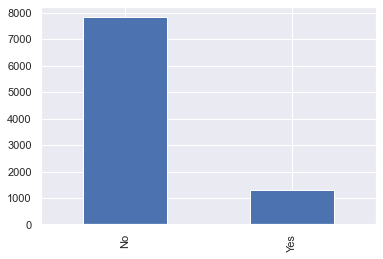

In [28]:
display(data['Response'].unique())
data['Response'].value_counts()
data['Response'].value_counts().plot(kind='bar')
#can be constructed using sns 

Show a plot of the response rate by the sales channel

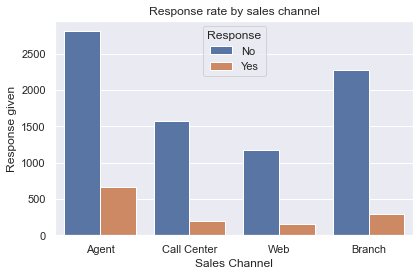

In [38]:
sns.set()
sns.countplot(data=data, x="Sales Channel", hue="Response")
plt.title("Response rate by sales channel")
plt.ylabel("Response given")
plt.xlabel("Sales Channel")
plt.tight_layout()
plt.show()


Show a plot of the response rate by the sales channel

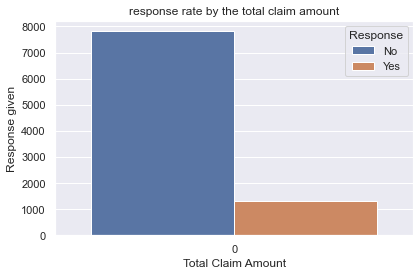

In [41]:
sns.set()
sns.countplot(data=data, x="Total Claim Amount", hue="Response")
plt.title("response rate by the total claim amount")
plt.ylabel("Response given")
plt.xlabel("Total Claim Amount")
plt.tight_layout()
plt.show()


Show a plot of the response rate by income

Here I have tried to visualise the data with Box plots. From Tableau we understood that a Dimension like "Response" can be used to split the measurement like "Income"

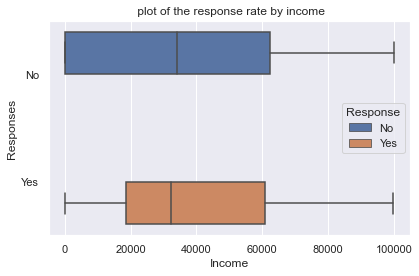

In [46]:
sns.set()
sns.boxplot(x = 'Income',y='Response', hue = "Response", data=data)
plt.title(" plot of the response rate by income")
plt.ylabel("Responses")
plt.xlabel("Income")
plt.tight_layout()
plt.show()


TypeError: subplots() takes from 0 to 2 positional arguments but 3 were given